# Question 3: Exploratory Data Analysis - Seasonal Tourism Patterns

## Research Question
**Are certain regions more affected by seasonal tourism trends than others?**

This notebook performs comprehensive exploratory data analysis to understand seasonal tourism patterns across different regions (continents) and identify which regions experience the most significant seasonal variations.


In [49]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## Step 1: Load and Prepare Data

We'll load the trends data and perform the same preprocessing steps as in the preprocessing notebook to ensure consistency.


In [50]:
# Load preprocessed datasets from preprocessing notebook
import os

data_dir = './Question3/preprocessed_data'

# Load main datasets
df_long = pd.read_csv(f'{data_dir}/df_long.csv')
df_continent_monthly = pd.read_csv(f'{data_dir}/df_continent_monthly.csv')
city_monthly_avg = pd.read_csv(f'{data_dir}/city_monthly_avg.csv')
df_seasonal_stats = pd.read_csv(f'{data_dir}/df_seasonal_stats.csv')
df_seasonal_variation = pd.read_csv(f'{data_dir}/df_seasonal_variation.csv')

# Convert date columns to datetime
df_long['date'] = pd.to_datetime(df_long['date'])
df_continent_monthly['date'] = pd.to_datetime(df_continent_monthly['date'])
city_monthly_avg['date'] = pd.to_datetime(city_monthly_avg['date'])

# Load continent-specific data
continent_data = {}
continents = df_long['continent'].unique()
for continent in continents:
    continent_filename = continent.replace(' ', '_').lower()
    continent_data[continent] = pd.read_csv(f'{data_dir}/continent_{continent_filename}.csv')
    continent_data[continent]['date'] = pd.to_datetime(continent_data[continent]['date'])

print("Data loaded successfully from preprocessed datasets!")
print(f"Dataset shape: {df_long.shape}")
print(f"Date range: {df_long['date'].min()} to {df_long['date'].max()}")
print(f"Number of cities: {df_long['city'].nunique()}")
print(f"Number of continents: {df_long['continent'].nunique()}")
print(f"\nContinents: {sorted(df_long['continent'].unique())}")


Data loaded successfully from preprocessed datasets!
Dataset shape: (1456, 9)
Date range: 2023-12-31 00:00:00 to 2025-12-21 00:00:00
Number of cities: 14
Number of continents: 6

Continents: ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


In [51]:
# Define month names dictionary for use throughout the notebook
month_names_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Data is already loaded from CSV files, so we can proceed with analysis
# Verify the seasonal variation data
print("Seasonal variation metrics loaded!")
print("\nSeasonal Variation by Continent (sorted by amplitude %):")
# Check which column name exists for coefficient of variation
cv_col = 'coefficient_of_variation' if 'coefficient_of_variation' in df_seasonal_variation.columns else 'avg_monthly_cv'
display_cols = ['continent', cv_col, 'seasonal_amplitude_pct', 'peak_season_month', 'low_season_month']
print(df_seasonal_variation[display_cols].to_string(index=False))


Seasonal variation metrics loaded!

Seasonal Variation by Continent (sorted by amplitude %):
    continent  avg_monthly_cv  seasonal_amplitude_pct  peak_season_month  low_season_month
       Africa       32.104205              183.542977                 11                 6
South America       35.837581              165.481481                  8                 4
North America       24.823579              116.797079                  8                 2
         Asia       24.764498               76.917989                  8                 6
       Europe       25.215465               55.610561                  8                12
      Oceania       15.716906               50.997151                 11                 5


## Visualization 1: Time Series Trends by Continent

This visualization shows how tourism index varies over time for each continent. Regions with wider fluctuations indicate higher seasonal sensitivity.


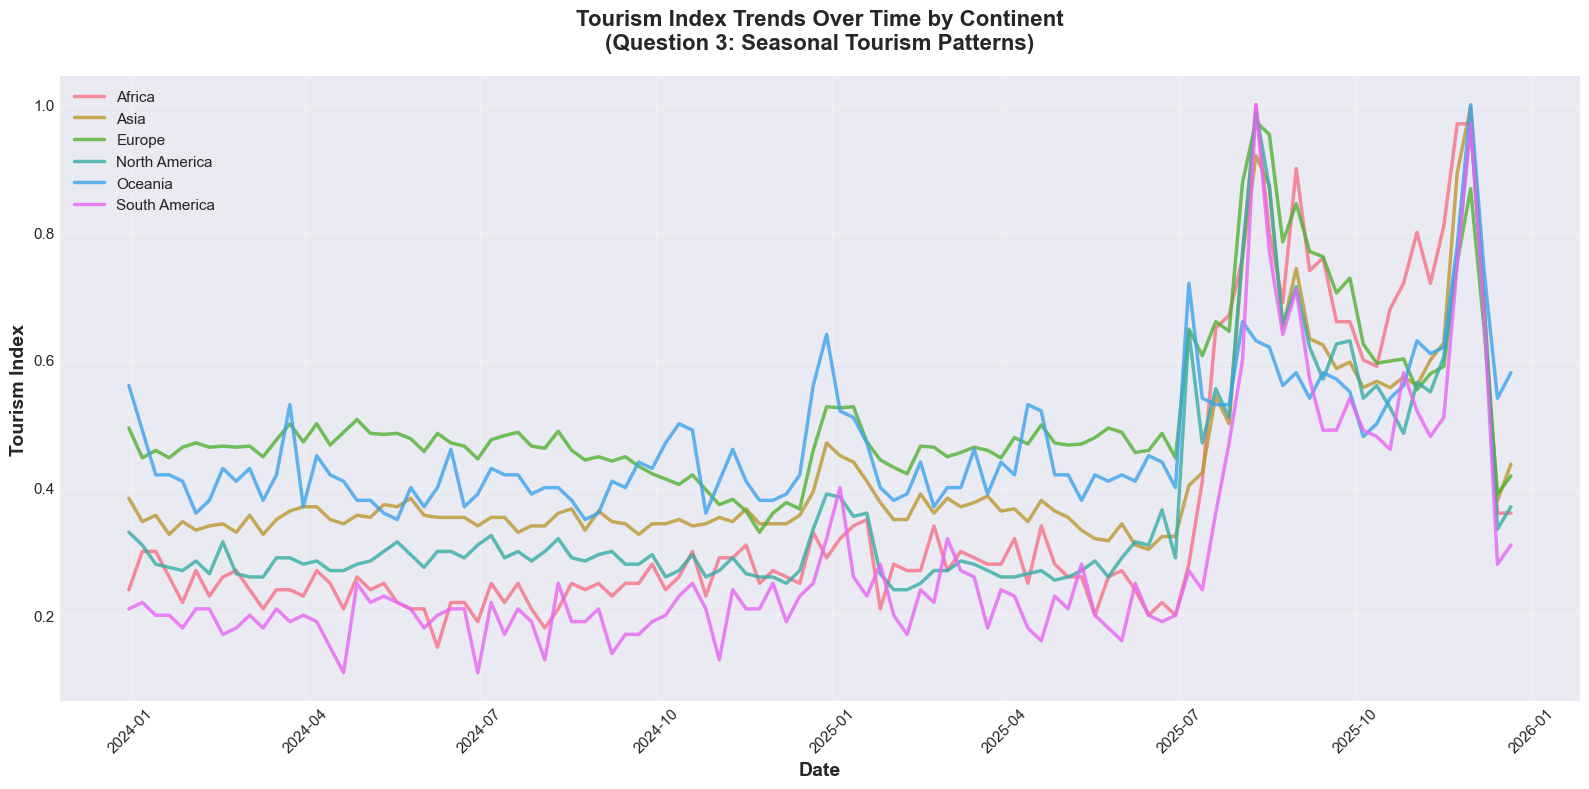


Interpretation:
This plot shows the temporal evolution of tourism index for each continent.
Regions with wider vertical spread (larger fluctuations) are more affected by seasonal trends.
Notice how some continents show more pronounced peaks and valleys than others.


In [ ]:
# Create time series plot by continent
fig, ax = plt.subplots(figsize=(16, 8))

# Plot each continent
for continent in sorted(df_long['continent'].unique()):
    continent_df = df_long[df_long['continent'] == continent]
    # Calculate weekly average for smoother visualization
    continent_weekly = continent_df.groupby('date')['tourism_index'].mean().reset_index()
    ax.plot(continent_weekly['date'], continent_weekly['tourism_index'], 
            label=continent, linewidth=2.5, alpha=0.8)

ax.set_xlabel('Date', fontsize=14, fontweight='bold')
ax.set_ylabel('Tourism Index', fontsize=14, fontweight='bold')
ax.set_title('Tourism Index Trends Over Time by Continent\n(Question 3: Seasonal Tourism Patterns)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=11)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualization 2: Seasonal Patterns - Monthly Averages by Continent

This visualization compares average tourism index by month across continents, revealing which regions have the most pronounced seasonal patterns.


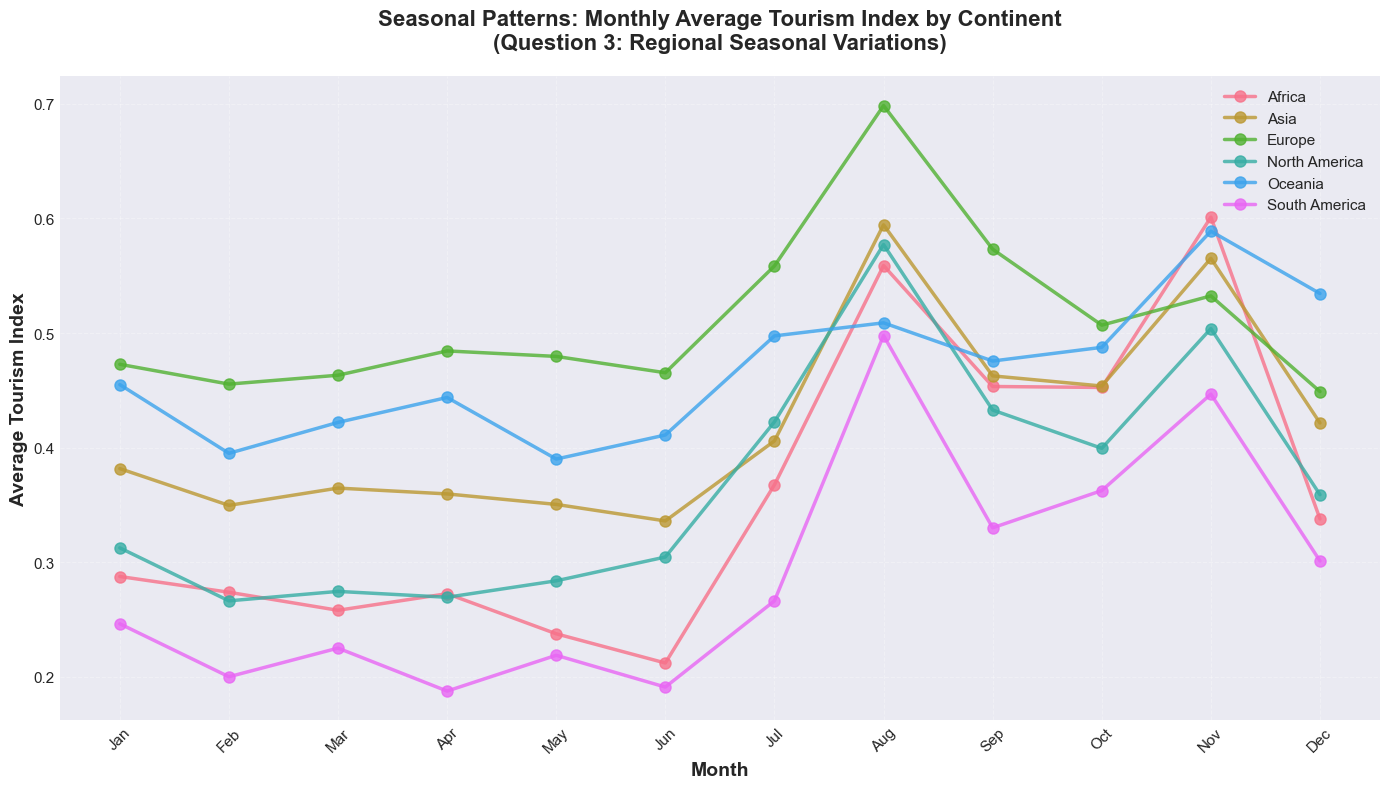


Interpretation:
This plot reveals seasonal patterns by showing how tourism index varies across months for each continent.
Continents with steeper curves (larger differences between peak and low months) are more affected by seasonality.
Notice the different peak seasons across continents (e.g., summer peaks vs. winter peaks).


In [ ]:
# Calculate monthly averages by continent
monthly_avg_by_continent = df_long.groupby(['continent', 'month'])['tourism_index'].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Month names for x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot each continent
for continent in sorted(df_long['continent'].unique()):
    continent_data = monthly_avg_by_continent[monthly_avg_by_continent['continent'] == continent]
    continent_data = continent_data.sort_values('month')
    ax.plot(continent_data['month'], continent_data['tourism_index'], 
            marker='o', label=continent, linewidth=2.5, markersize=8, alpha=0.8)

ax.set_xlabel('Month', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Tourism Index', fontsize=14, fontweight='bold')
ax.set_title('Seasonal Patterns: Monthly Average Tourism Index by Continent\n(Question 3: Regional Seasonal Variations)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names, rotation=45)
ax.legend(loc='best', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()
plt.show()

## Visualization 3: Seasonal Variation Metrics Comparison

This bar chart compares key metrics of seasonal variation across continents, directly answering which regions are most affected by seasonal trends.


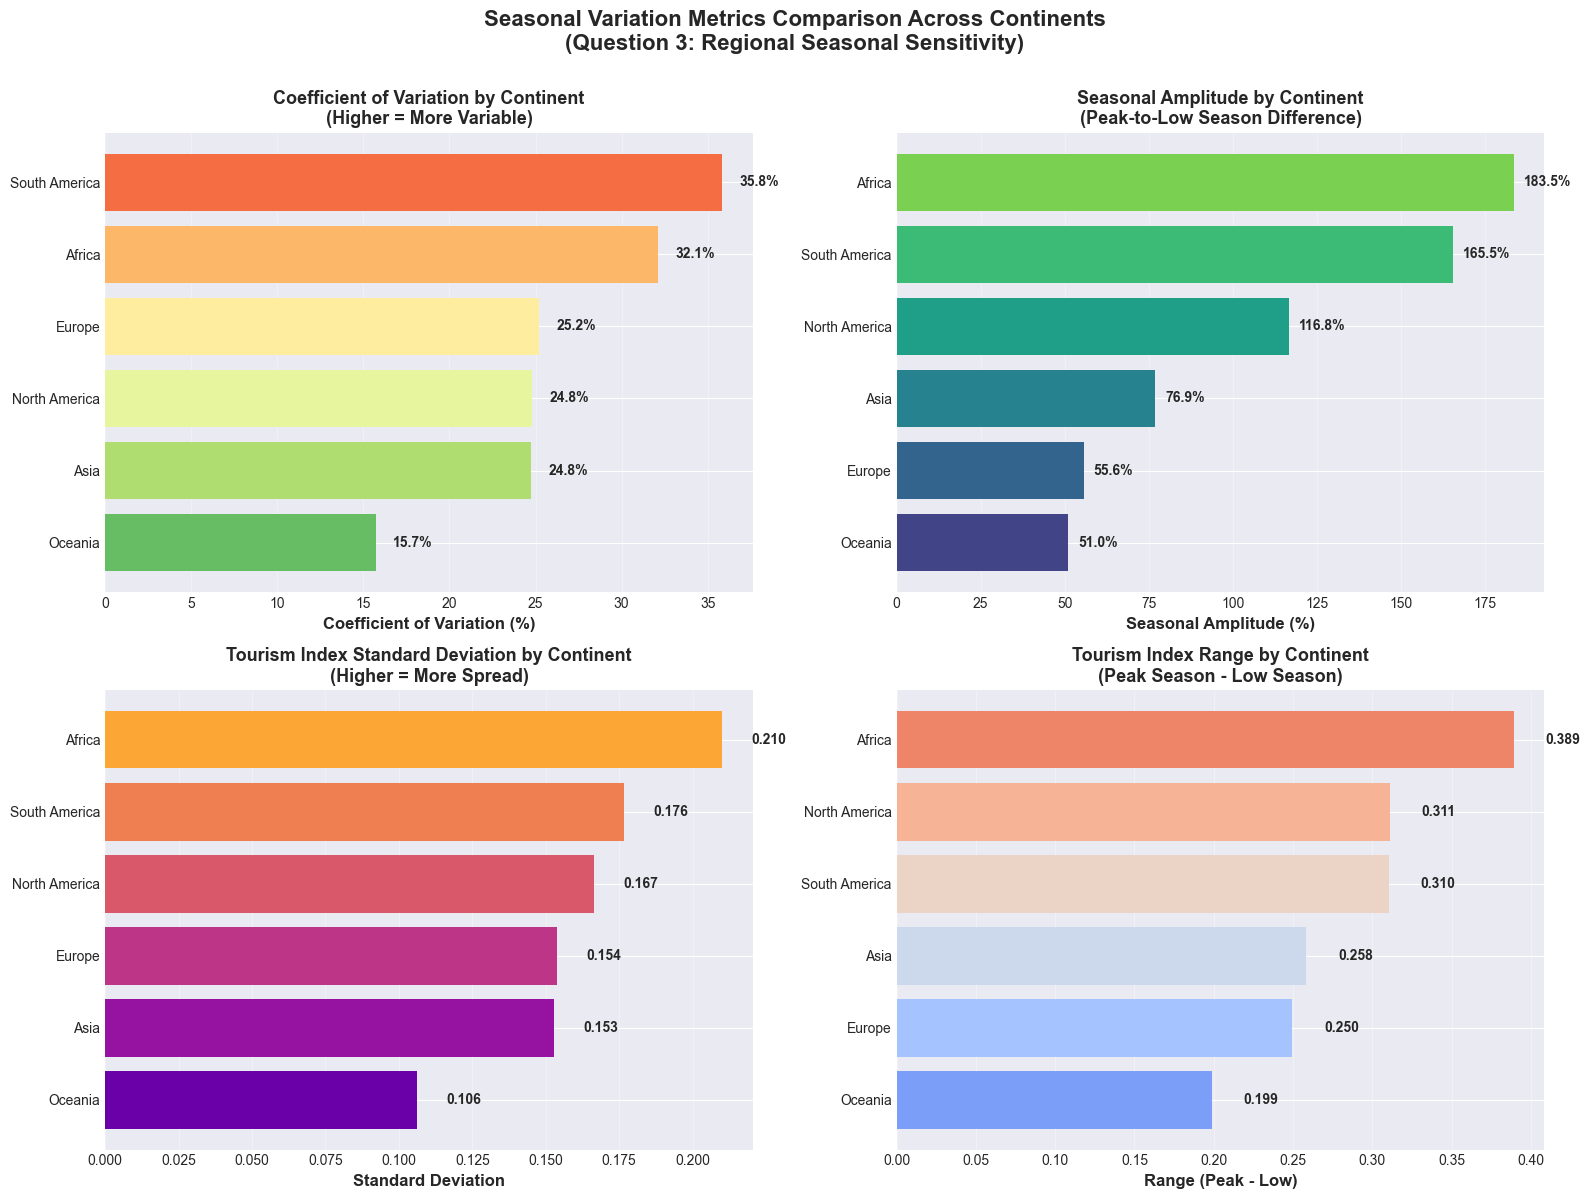


Interpretation:
These four metrics collectively show which regions are most affected by seasonal trends:
1. Coefficient of Variation: Relative variability (higher = more variable)
2. Seasonal Amplitude %: Percentage difference between peak and low seasons
3. Standard Deviation: Absolute spread of tourism index values
4. Range: Absolute difference between peak and low season values

Regions with higher values across these metrics are more affected by seasonal tourism trends.


In [ ]:
# Create comparison of seasonal variation metrics
# Determine which column name exists for coefficient of variation
cv_col = 'coefficient_of_variation' if 'coefficient_of_variation' in df_seasonal_variation.columns else 'avg_monthly_cv'

# Calculate standard deviation from df_long grouped by continent (needed for visualization)
if 'std_tourism_index' not in df_seasonal_variation.columns:
    std_by_continent = df_long.groupby('continent')['tourism_index'].std().reset_index()
    std_by_continent.columns = ['continent', 'std_tourism_index']
    df_seasonal_variation = df_seasonal_variation.merge(std_by_continent, on='continent', how='left')

# Create comparison of seasonal variation metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sort by coefficient of variation for better visualization
df_sorted = df_seasonal_variation.sort_values(cv_col, ascending=True)

# 1. Coefficient of Variation
ax1 = axes[0, 0]
colors1 = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(df_sorted)))
bars1 = ax1.barh(df_sorted['continent'], df_sorted[cv_col], color=colors1)
ax1.set_xlabel('Coefficient of Variation (%)', fontsize=12, fontweight='bold')
ax1.set_title('Coefficient of Variation by Continent\n(Higher = More Variable)', 
              fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')
ax1.tick_params(axis='both', which='major', labelsize=10)

# Add value labels on bars
for i, (idx, row) in enumerate(df_sorted.iterrows()):
    ax1.text(row[cv_col] + 1, i, f"{row[cv_col]:.1f}%", 
             va='center', fontsize=10, fontweight='bold')

# 2. Seasonal Amplitude Percentage
ax2 = axes[0, 1]
df_sorted_amp = df_seasonal_variation.sort_values('seasonal_amplitude_pct', ascending=True)
colors2 = plt.cm.viridis(np.linspace(0.2, 0.8, len(df_sorted_amp)))
bars2 = ax2.barh(df_sorted_amp['continent'], df_sorted_amp['seasonal_amplitude_pct'], color=colors2)
ax2.set_xlabel('Seasonal Amplitude (%)', fontsize=12, fontweight='bold')
ax2.set_title('Seasonal Amplitude by Continent\n(Peak-to-Low Season Difference)', 
              fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
ax2.tick_params(axis='both', which='major', labelsize=10)

# Add value labels
for i, (idx, row) in enumerate(df_sorted_amp.iterrows()):
    ax2.text(row['seasonal_amplitude_pct'] + 3, i, f"{row['seasonal_amplitude_pct']:.1f}%", 
             va='center', fontsize=10, fontweight='bold')

# 3. Standard Deviation
# 3. Standard Deviation
ax3 = axes[1, 0]
df_sorted_std = df_seasonal_variation.sort_values('std_tourism_index', ascending=True)
colors3 = plt.cm.plasma(np.linspace(0.2, 0.8, len(df_sorted_std)))
bars3 = ax3.barh(df_sorted_std['continent'], df_sorted_std['std_tourism_index'], color=colors3)
ax3.set_xlabel('Standard Deviation', fontsize=12, fontweight='bold')
ax3.set_title('Tourism Index Standard Deviation by Continent\n(Higher = More Spread)', 
              fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')
ax3.tick_params(axis='both', which='major', labelsize=10)

# Add value labels
for i, (idx, row) in enumerate(df_sorted_std.iterrows()):
    ax3.text(row['std_tourism_index'] + 0.01, i, f"{row['std_tourism_index']:.3f}", 
             va='center', fontsize=10, fontweight='bold')

# 4. Range (Max - Min)
df_seasonal_variation['range'] = df_seasonal_variation['peak_value'] - df_seasonal_variation['low_value']
ax4 = axes[1, 1]
df_sorted_range = df_seasonal_variation.sort_values('range', ascending=True)
colors4 = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(df_sorted_range)))
bars4 = ax4.barh(df_sorted_range['continent'], df_sorted_range['range'], color=colors4)
ax4.set_xlabel('Range (Peak - Low)', fontsize=12, fontweight='bold')
ax4.set_title('Tourism Index Range by Continent\n(Peak Season - Low Season)', 
              fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')
ax4.tick_params(axis='both', which='major', labelsize=10)

# Add value labels
for i, (idx, row) in enumerate(df_sorted_range.iterrows()):
    ax4.text(row['range'] + 0.02, i, f"{row['range']:.3f}", 
             va='center', fontsize=10, fontweight='bold')

plt.suptitle('Seasonal Variation Metrics Comparison Across Continents\n(Question 3: Regional Seasonal Sensitivity)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()


## Visualization 4: Heatmap of Seasonal Patterns by Month and Continent

This heatmap provides a comprehensive view of how tourism index varies across months and continents, making it easy to identify seasonal patterns and regional differences.


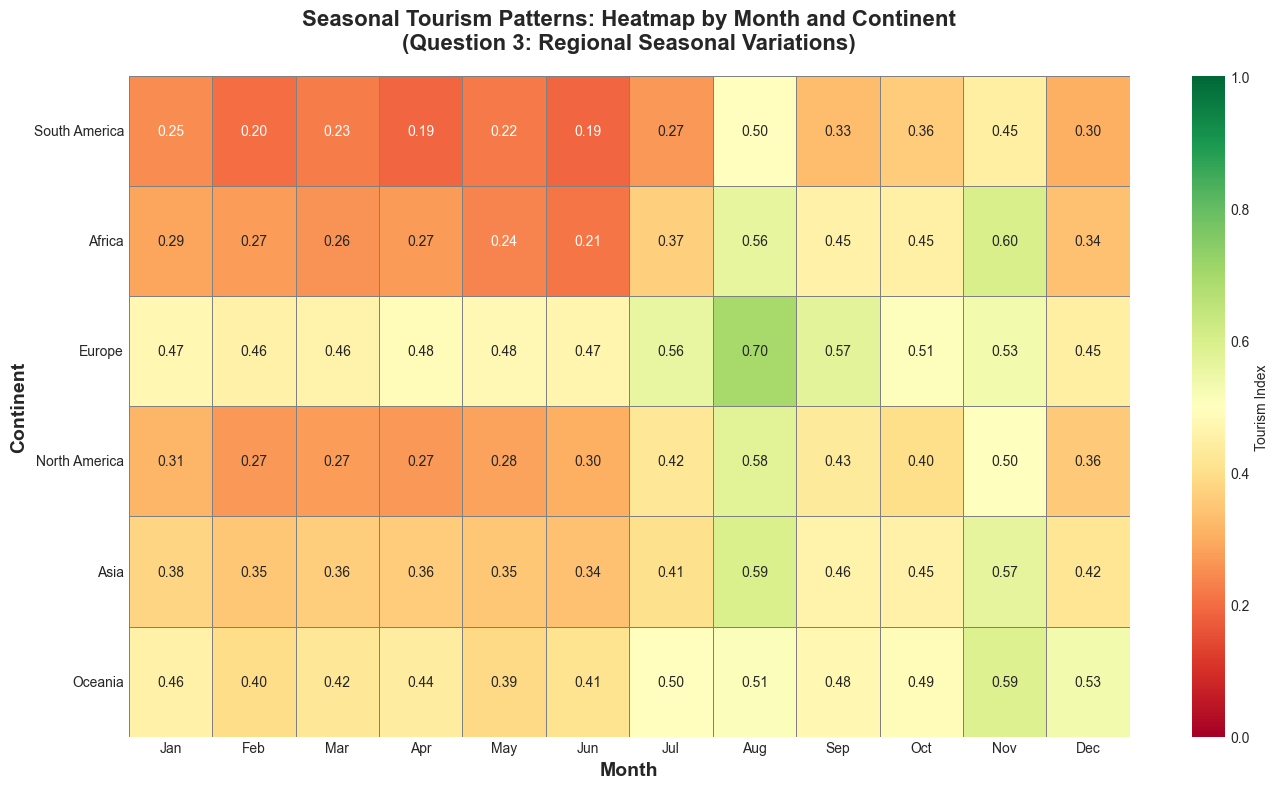


Interpretation:
This heatmap shows tourism index values across months (columns) and continents (rows).
Darker green indicates higher tourism index, while darker red indicates lower values.
Continents with more color variation across months (more diverse colors in a row) are more affected by seasonality.
Notice how some continents show clear seasonal patterns (e.g., summer peaks) while others are more stable.


In [ ]:
# Create pivot table for heatmap
monthly_avg_pivot = df_long.groupby(['continent', 'month'])['tourism_index'].mean().reset_index()
heatmap_data = monthly_avg_pivot.pivot(index='continent', columns='month', values='tourism_index')

# Determine which column name exists for coefficient of variation
cv_col = 'coefficient_of_variation' if 'coefficient_of_variation' in df_seasonal_variation.columns else 'avg_monthly_cv'

# Sort continents by average coefficient of variation (most variable first)
continent_order = df_seasonal_variation.sort_values(cv_col, ascending=False)['continent'].tolist()
heatmap_data = heatmap_data.reindex(continent_order)

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 8))

# Use a diverging colormap
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            cbar_kws={'label': 'Tourism Index'}, 
            linewidths=0.5, linecolor='gray', 
            ax=ax, vmin=0, vmax=1)

ax.set_xlabel('Month', fontsize=14, fontweight='bold')
ax.set_ylabel('Continent', fontsize=14, fontweight='bold')
ax.set_title('Seasonal Tourism Patterns: Heatmap by Month and Continent\n(Question 3: Regional Seasonal Variations)', 
             fontsize=16, fontweight='bold', pad=20)

# Set month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_labels, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Visualization 5: Distribution of Tourism Index by Continent

This box plot shows the distribution and spread of tourism index values for each continent, revealing variability and outliers.


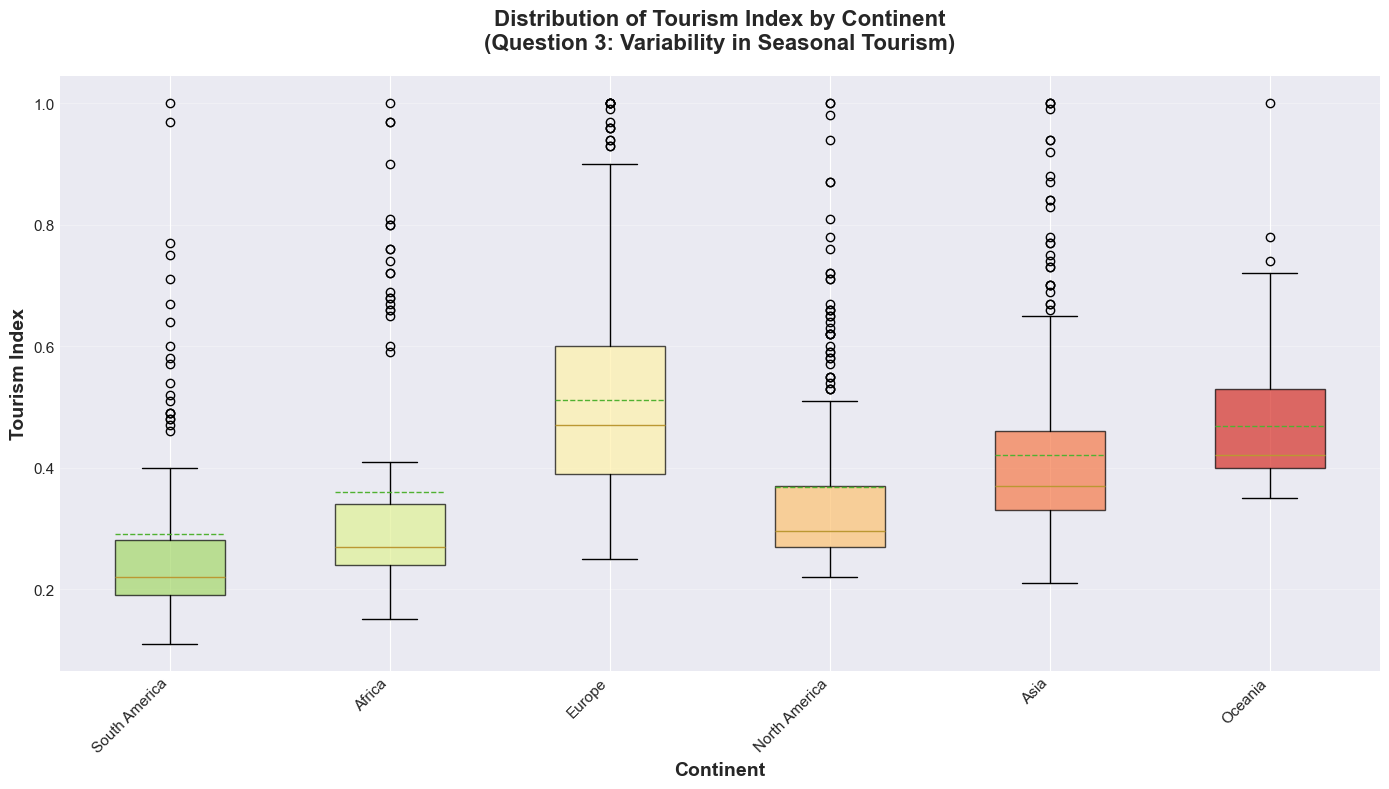


Interpretation:
This box plot shows the distribution of tourism index values for each continent.
Key elements:
- Box: Interquartile range (IQR) - middle 50% of values
- Whiskers: Range of values (excluding outliers)
- Mean line: Average tourism index
- Outliers: Extreme values

Continents with:
- Wider boxes: More variability in tourism index
- Longer whiskers: Greater range of values
- More outliers: More extreme seasonal variations

These characteristics indicate regions more affected by seasonal trends.


In [ ]:
# Create box plot
fig, ax = plt.subplots(figsize=(14, 8))

# Determine which column name exists for coefficient of variation
cv_col = 'coefficient_of_variation' if 'coefficient_of_variation' in df_seasonal_variation.columns else 'avg_monthly_cv'

# Sort continents by coefficient of variation for better visualization
continent_order = df_seasonal_variation.sort_values(cv_col, ascending=False)['continent'].tolist()

# Prepare data in order
plot_data = [df_long[df_long['continent'] == cont]['tourism_index'].values for cont in continent_order]

# Create box plot
bp = ax.boxplot(plot_data, labels=continent_order, patch_artist=True, 
                showmeans=True, meanline=True)

# Color boxes based on coefficient of variation
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(continent_order)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize plot
ax.set_xlabel('Continent', fontsize=14, fontweight='bold')
ax.set_ylabel('Tourism Index', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Tourism Index by Continent\n(Question 3: Variability in Seasonal Tourism)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')
ax.tick_params(axis='both', which='major', labelsize=11)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Visualization 6: Peak and Low Season Analysis

This visualization compares peak and low seasons across continents, showing when each region experiences its highest and lowest tourism activity.


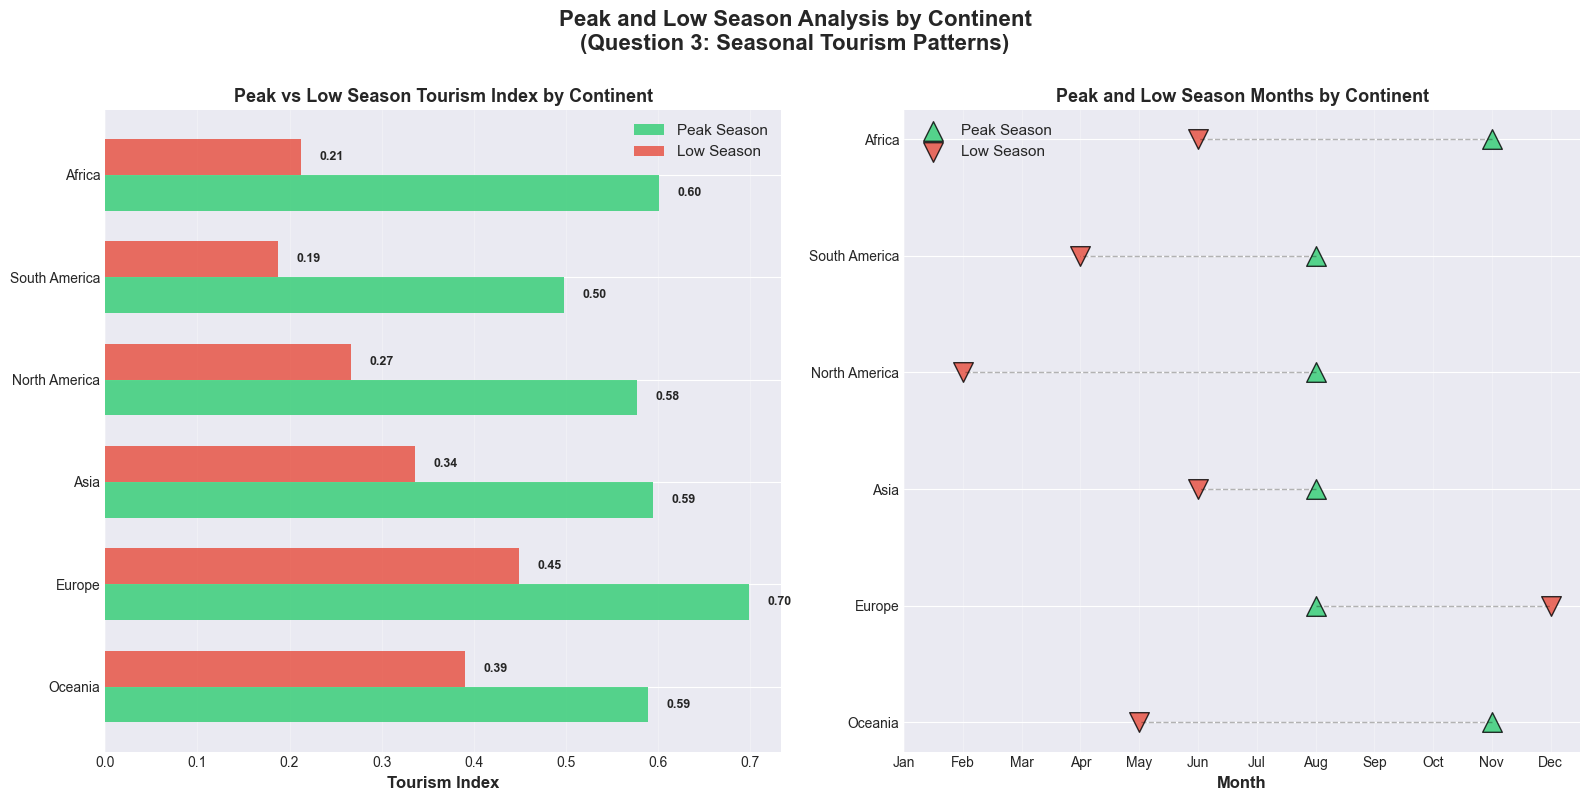


Interpretation:
Left plot: Shows the actual tourism index values during peak and low seasons.
  - Larger gaps between bars indicate greater seasonal variation
  - Continents with larger gaps are more affected by seasonal trends

Right plot: Shows which months are peak and low seasons for each continent.
  - Reveals timing of seasonal patterns (e.g., summer peaks, winter lows)
  - Lines connect peak to low season, showing the seasonal cycle
  - Different peak months across continents indicate regional seasonal differences


In [ ]:
# Prepare data for peak/low season comparison
peak_low_data = df_seasonal_variation[['continent', 'peak_season_month', 'low_season_month', 
                                       'peak_value', 'low_value', 'seasonal_amplitude_pct']].copy()

# Sort by seasonal amplitude
peak_low_data = peak_low_data.sort_values('seasonal_amplitude_pct', ascending=True)

# Use month_names_dict defined earlier
peak_low_data['peak_month_name'] = peak_low_data['peak_season_month'].map(month_names_dict)
peak_low_data['low_month_name'] = peak_low_data['low_season_month'].map(month_names_dict)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Peak and Low Values
x_pos = np.arange(len(peak_low_data))
width = 0.35

bars1 = ax1.barh(x_pos - width/2, peak_low_data['peak_value'], width, 
                 label='Peak Season', color='#2ecc71', alpha=0.8)
bars2 = ax1.barh(x_pos + width/2, peak_low_data['low_value'], width, 
                 label='Low Season', color='#e74c3c', alpha=0.8)

ax1.set_yticks(x_pos)
ax1.set_yticklabels(peak_low_data['continent'])
ax1.set_xlabel('Tourism Index', fontsize=12, fontweight='bold')
ax1.set_title('Peak vs Low Season Tourism Index by Continent', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='x')
ax1.tick_params(axis='both', which='major', labelsize=10)

# Add value labels
for i, (idx, row) in enumerate(peak_low_data.iterrows()):
    ax1.text(row['peak_value'] + 0.02, i - width/2, f"{row['peak_value']:.2f}", 
             va='center', fontsize=9, fontweight='bold')
    ax1.text(row['low_value'] + 0.02, i + width/2, f"{row['low_value']:.2f}", 
             va='center', fontsize=9, fontweight='bold')

# Plot 2: Peak and Low Months
# Create a visual representation of peak/low months
month_colors = plt.cm.viridis(np.linspace(0, 1, 12))
month_to_num = {name: num for num, name in month_names_dict.items()}

# Prepare data for plotting
peak_months = [month_to_num[name] for name in peak_low_data['peak_month_name']]
low_months = [month_to_num[name] for name in peak_low_data['low_month_name']]

scatter1 = ax2.scatter(peak_months, range(len(peak_low_data)), 
                      s=200, c='#2ecc71', marker='^', label='Peak Season', alpha=0.8, edgecolors='black')
scatter2 = ax2.scatter(low_months, range(len(peak_low_data)), 
                      s=200, c='#e74c3c', marker='v', label='Low Season', alpha=0.8, edgecolors='black')

# Draw lines connecting peak and low
for i, (idx, row) in enumerate(peak_low_data.iterrows()):
    peak_month = month_to_num[row['peak_month_name']]
    low_month = month_to_num[row['low_month_name']]
    ax2.plot([peak_month, low_month], [i, i], 'k--', alpha=0.3, linewidth=1)

ax2.set_yticks(range(len(peak_low_data)))
ax2.set_yticklabels(peak_low_data['continent'])
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_title('Peak and Low Season Months by Continent', 
              fontsize=13, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(list(month_names_dict.values()))
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='x')
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.suptitle('Peak and Low Season Analysis by Continent\n(Question 3: Seasonal Tourism Patterns)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

## Summary Statistics and Key Findings

Let's summarize the key findings from our exploratory data analysis.


In [58]:
# Display comprehensive summary
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY - QUESTION 3")
print("="*80)
print("\nResearch Question: Are certain regions more affected by seasonal tourism trends than others?")
print("\n" + "="*80)
print("\nKEY FINDINGS:")
print("="*80)

print("\n1. MOST AFFECTED REGIONS (by Coefficient of Variation):")
print("-" * 60)
top_affected = df_seasonal_variation.nlargest(3, cv_col)
for idx, row in top_affected.iterrows():
    print(f"   {row['continent']:20s}: CV = {row[cv_col]:.2f}% | "
          f"Amplitude = {row['seasonal_amplitude_pct']:.1f}%")

print("\n2. LEAST AFFECTED REGIONS (by Coefficient of Variation):")
print("-" * 60)
least_affected = df_seasonal_variation.nsmallest(3, cv_col)
for idx, row in least_affected.iterrows():
    print(f"   {row['continent']:20s}: CV = {row[cv_col]:.2f}% | "
          f"Amplitude = {row['seasonal_amplitude_pct']:.1f}%")

print("\n3. SEASONAL AMPLITUDE RANKING:")
print("-" * 60)
# Determine which column name exists for coefficient of variation
cv_col = 'coefficient_of_variation' if 'coefficient_of_variation' in df_seasonal_variation.columns else 'avg_monthly_cv'
amplitude_rank = df_seasonal_variation.sort_values('seasonal_amplitude_pct', ascending=False)
for i, (idx, row) in enumerate(amplitude_rank.iterrows(), 1):
    print(f"   {i}. {row['continent']:20s}: {row['seasonal_amplitude_pct']:.1f}% "
          f"(Peak: {row['peak_value']:.2f} in {month_names_dict[row['peak_season_month']]}, "
          f"Low: {row['low_value']:.2f} in {month_names_dict[row['low_season_month']]})")

print("\n4. PEAK SEASON PATTERNS:")
print("-" * 60)
peak_seasons = df_seasonal_variation.groupby('peak_season_month')['continent'].apply(list).to_dict()
for month_num, continents in sorted(peak_seasons.items()):
    print(f"   {month_names_dict[month_num]:3s} (Month {month_num:2d}): {', '.join(continents)}")

print("\n5. LOW SEASON PATTERNS:")
print("-" * 60)
low_seasons = df_seasonal_variation.groupby('low_season_month')['continent'].apply(list).to_dict()
for month_num, continents in sorted(low_seasons.items()):
    print(f"   {month_names_dict[month_num]:3s} (Month {month_num:2d}): {', '.join(continents)}")

print("\n" + "="*80)
print("CONCLUSION:")
print("="*80)
print("\nBased on the exploratory data analysis:")
most_affected = df_seasonal_variation.loc[df_seasonal_variation[cv_col].idxmax()]
least_affected_region = df_seasonal_variation.loc[df_seasonal_variation[cv_col].idxmin()]

print(f"\n✓ {most_affected['continent']} is the MOST affected by seasonal trends")
print(f"  (CV: {most_affected[cv_col]:.1f}%, Amplitude: {most_affected['seasonal_amplitude_pct']:.1f}%)")

print(f"\n✓ {least_affected_region['continent']} is the LEAST affected by seasonal trends")
print(f"  (CV: {least_affected_region[cv_col]:.1f}%, Amplitude: {least_affected_region['seasonal_amplitude_pct']:.1f}%)")

print("\n✓ There are significant regional differences in seasonal tourism patterns")
print("  - Some regions show dramatic seasonal swings (e.g., Africa, South America)")
print("  - Others maintain more stable tourism levels throughout the year (e.g., Oceania, Europe)")

print("\n" + "="*80)


EXPLORATORY DATA ANALYSIS SUMMARY - QUESTION 3

Research Question: Are certain regions more affected by seasonal tourism trends than others?


KEY FINDINGS:

1. MOST AFFECTED REGIONS (by Coefficient of Variation):
------------------------------------------------------------
   South America       : CV = 35.84% | Amplitude = 165.5%
   Africa              : CV = 32.10% | Amplitude = 183.5%
   Europe              : CV = 25.22% | Amplitude = 55.6%

2. LEAST AFFECTED REGIONS (by Coefficient of Variation):
------------------------------------------------------------
   Oceania             : CV = 15.72% | Amplitude = 51.0%
   Asia                : CV = 24.76% | Amplitude = 76.9%
   North America       : CV = 24.82% | Amplitude = 116.8%

3. SEASONAL AMPLITUDE RANKING:
------------------------------------------------------------
   1. Africa              : 183.5% (Peak: 0.60 in Nov, Low: 0.21 in Jun)
   2. South America       : 165.5% (Peak: 0.50 in Aug, Low: 0.19 in Apr)
   3. North America   